# Štatistika akademických vysledkov a času strávením učením sa a spánkom.
V tejto úlohe spracujem dáta o študentoch a ich finálnych výsledkoch z testov v závislosti od počtu hodín, ktoré sa pripravovali na daný test, priemerného počtu hodín spánku každý deň a úrovne stresu. Nakoniec sa pozrieme aj na to, či počet hodín spánku zodpovedá normálnemu rozdeleniu.

 Pôvod dát je z https://www.kaggle.com/datasets/mahhmoudelhemaly/students-grading-dataset

## Štruktúra dát
Dáta pozostávajú z riadkov obsahujúcich nasledujúce informácie o daných študentoch ID študenta, krstné meno, priezvisko, Email, pohlavie, vek, zameranie v škole, docháddzka, výsledky z midtermu, výsledky z koncoročného testu, body za projekt, celkové skore, celková známka, kolko študent študuje týždenne, mimoškolské aktivity (ano/nie), prístup k internetu doma, vzdelanie rodičov, rodinný príjem, level stresu (1-10), hodiny spánku každú noc

### Načítanie dát pomocou pandas.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

df = pd.read_csv('students_grading.csv')
print(df.head(10))

  Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   
5      S1005       Liam     Brown  student5@university.com    Male   21   
6      S1006      Ahmed     Jones  student6@university.com    Male   24   
7      S1007      Ahmed     Smith  student7@university.com    Male   19   
8      S1008       Omar     Smith  student8@university.com  Female   21   
9      S1009       Sara     Smith  student9@university.com  Female   22   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          

Ako prvé sa pokúsime zistiť, či existuje korelácia medzi finálnym skóre a počtom hodín, ktoré sa žiak učil, a následne aj to, či existuje korelácia medzi úrovňou stresu a počtom hodín spánku. Predpokladám, že v oboch prípadoch by sme mali zistiť, že čím viac času žiak študoval, tým lepší bude mať výsledok, a že žiak s nižšou mierou stresu spí viac.

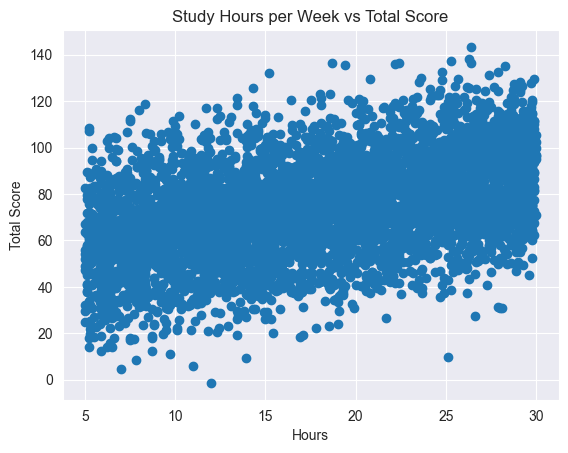

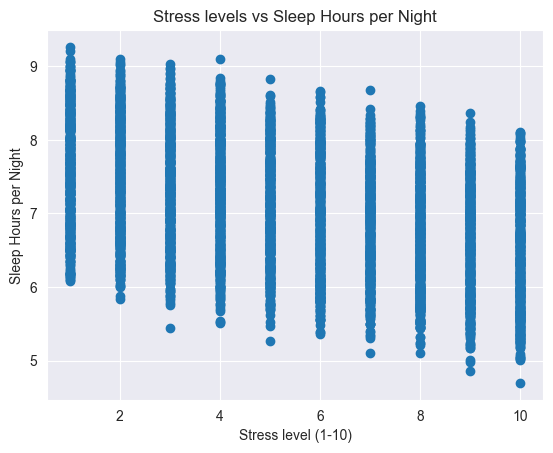

In [44]:
hours_learning = df['Study_Hours_per_Week'].values.reshape(-1, 1)
total_score = df['Total_Score'].values
stress = df['Stress_Level (1-10)'].values.reshape(-1, 1)
sleep = df['Sleep_Hours_per_Night'].values


plt.scatter(hours_learning, total_score)
plt.title('Study Hours per Week vs Total Score')
plt.xlabel('Hours')
plt.ylabel('Total Score')
plt.grid(True)
plt.show()

plt.scatter(stress,sleep)
plt.title('Stress levels vs Sleep Hours per Night')
plt.xlabel('Stress level (1-10)')
plt.ylabel('Sleep Hours per Night')
plt.grid(True)
plt.show()


Na základe grafu môžeme predpokladať existenciu aspoň slabej korelácie medzi danými premennými, ktorú následne overíme použitím lineárnej regresie.

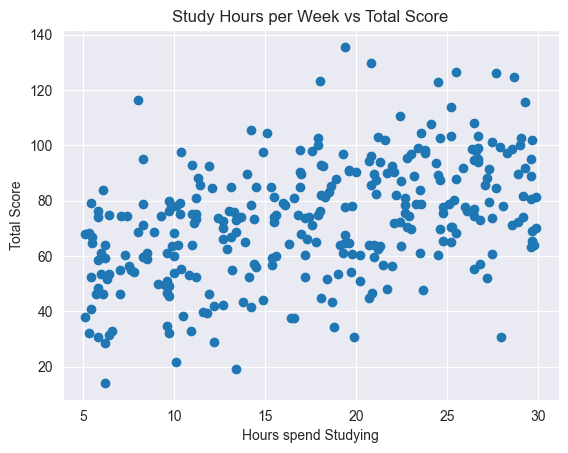

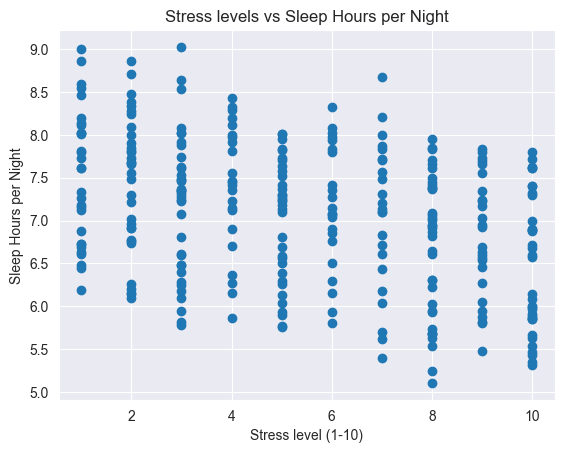

In [45]:
hours_learning_s = df['Study_Hours_per_Week'][:300]
total_score_s = df['Total_Score'][:300]

stress_s = df['Stress_Level (1-10)'][:300]
sleep_s = df['Sleep_Hours_per_Night'][:300]

plt.scatter(hours_learning_s, total_score_s)
plt.title('Study Hours per Week vs Total Score')
plt.xlabel('Hours spend Studying')
plt.ylabel('Total Score')
plt.grid(True)
plt.show()

plt.scatter(stress_s,sleep_s)
plt.title('Stress levels vs Sleep Hours per Night')
plt.xlabel('Stress level (1-10)')
plt.ylabel('Sleep Hours per Night')
plt.grid(True)
plt.show()


Vykreslenie menšej vzorky datasetu(prvých 300 vzoriek).

In [46]:
def analyze_and_plot(x, x_label, y, title,y_label):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r2 = r2_score(y, y_pred)

    print("-"*40)
    print(f"{x_label} vs. {y_label}")
    print(f"Koeficient (smernica) = {model.coef_[0]:.2f}")
    print(f"R² stres → spánok: {r2:.2f}")
    print(f"  Absolútna hodnota (intercept) = {model.intercept_:.2f}")
    print("-"*40)

    # Vykreslenie
    plt.scatter(x, y, label='Skutočné hodnoty')
    plt.plot(x, y_pred, color='red', label='Regresná priamka')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

Teraz prevediemie lineárnu regresiu.

----------------------------------------
Study Hours per Week vs. Total score
Koeficient (smernica) = 1.30
R² stres → spánok: 0.20
  Absolútna hodnota (intercept) = 50.72
----------------------------------------


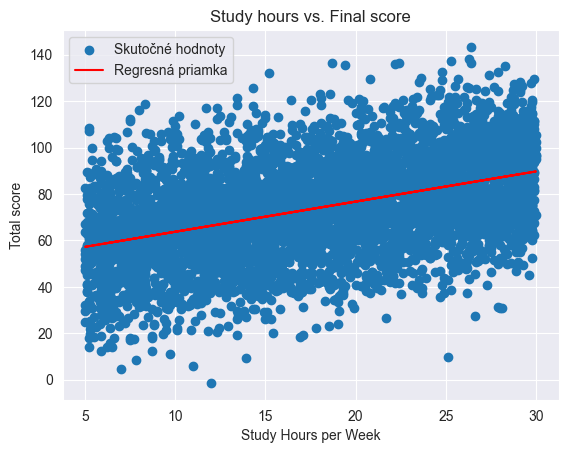

In [47]:
analyze_and_plot(hours_learning, 'Study Hours per Week', total_score, 'Study hours vs. Final score','Total score')

- Na základe výsledkov môžeme povedať, že existuje mierna pozitívna lineárna závislosť medzi výsledkami z testov a počtom hodín, ktoré študent strávi štúdiom.
- Regresný koeficient 1,30 naznačuje, že priemerne za každú dodatočnú hodinu štúdia získa študent o 1,3 bodu viac vo finálnom teste.
- Hodnota R² = 0,20 znamená, že počet hodín štúdia vysvetľuje približne 20 % variability v celkovom skóre.
- Výsledok je teda pomerne očakávaný – študent, ktorý sa učí dlhšie, môže očakávať lepšie výsledky z testu.

----------------------------------------
Stress levels vs. Sleep Hours per Night
Koeficient (smernica) = -0.12
R² stres → spánok: 0.18
  Absolútna hodnota (intercept) = 7.74
----------------------------------------


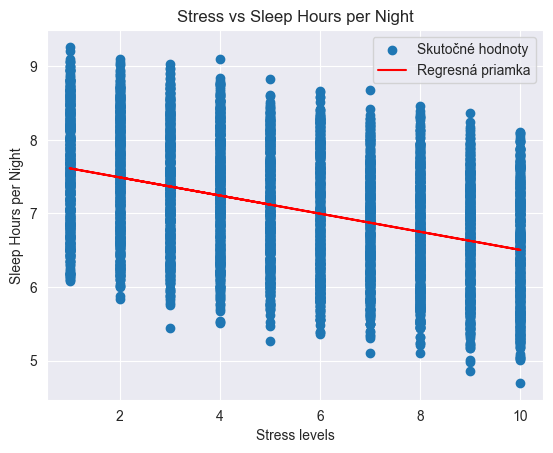

In [48]:
analyze_and_plot(stress, 'Stress levels',sleep, 'Stress vs Sleep Hours per Night','Sleep Hours per Night')


- Na základe výsledkov môžeme povedať, že existuje mierna negatívna lineárna závislosť medzi úrovňou stresu a počtom hodín, ktoré študent strávi spánkom.
- Regresný koeficient –0,12 naznačuje, že priemerne za každý jeden stupeň stresu navyše spí študent o 0,12 hodiny menej, čo predstavuje približne 7 minút.
- Hodnota R² = 0,18 znamená, že stres vysvetľuje približne 18 % variability v počte hodín spánku.
- Z toho vyplýva, že študenti s vyššou mierou stresu majú tendenciu spať menej.


V závere analyzujeme, či je rozdelenie počtu hodín spánku medzi študentmi v súlade s normálnym rozdelením.

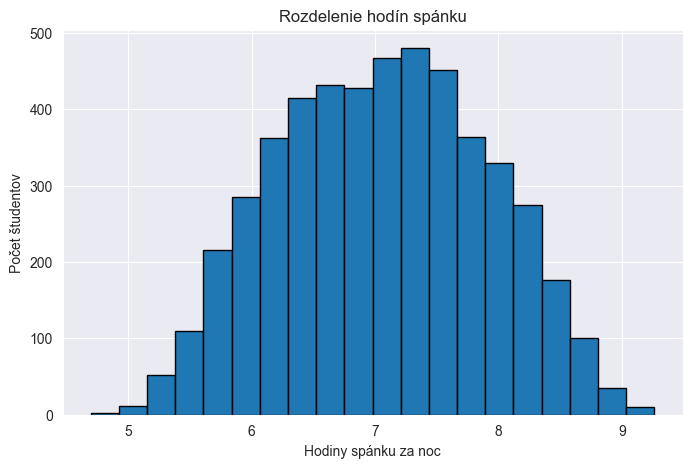

In [49]:

plt.figure(figsize=(8, 5))
plt.hist(sleep, bins=20, edgecolor='black')
plt.title('Rozdelenie hodín spánku')
plt.xlabel('Hodiny spánku za noc')
plt.ylabel('Počet študentov')
plt.grid(True)
plt.show()

Podľa grafu sa zdá, že počet hodín strávených spánkom by mohol mať normálne rozdelenie.

Q Q plot nášho rozdelenia a normálneho rozdelenia

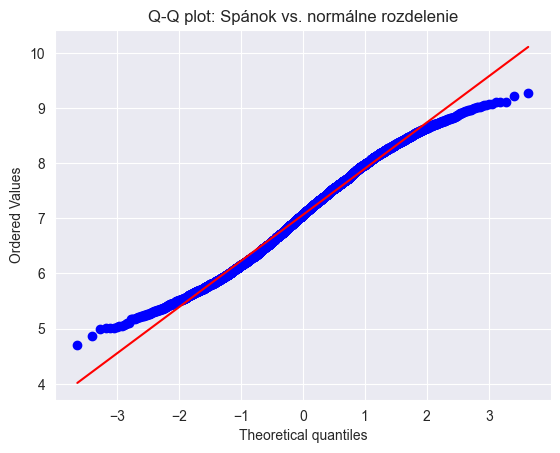

In [50]:
stats.probplot(sleep, dist="norm", plot=plt)
plt.title('Q-Q plot: Spánok vs. normálne rozdelenie')
plt.grid(True)
plt.show()

Vidíme, že grafy sa síce podobajú, ale úplne sa nezhodujú – najmä na začiatku a na konci. Z toho môžeme usúdiť, že dáta pravdepodobne nepochádzajú z normálneho rozdelenia.


Z analýzy vyplýva, že množstvo času stráveného štúdiom a spánkom má vplyv na akademické výsledky študentov. Vyššia miera stresu je naopak často spojená s horšími výsledkami. Hoci model priamo nepredpovedá výsledky, naznačuje existenciu vzťahu medzi sledovanými premennými.

In [ ]:
df = pd.read_csv('students_grading.csv')
sleep = df['Sleep_Hours_per_Night'].values

# Shapiro–Wilk test
stat, p_value = shapiro(sleep)

print(f"Shapiro–Wilk statistika: {stat:.4f}")
print(f"p-hodnota: {p_value:.4f}")

# Interpretace
alpha = 0.05
if p_value > alpha:
    print("Nelze zamítnout H0: data vypadají jako z normálního rozdělení.")
else:
    print("Zamítáme H0: data se významně liší od normálního rozdělení.")